## Load Data

In [1]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from math import log, exp
from sklearn import linear_model
#This is to disable the warning info
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
##the functions created in preprocess module
from preprocess import impute_multi_1, label_en
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [6]:
#This function works to generate CSV
def model_to_csv(model, x_test, test_ID, csv_name):
    y = model.predict(x_test)
    y = pd.Series([(exp(y[i]) + x_test['MiscVal'][i]) for i in range(len(x_test))],name='SalePrice')
    y_out = pd.concat([test_ID, y], axis=1)
    y_out.to_csv('%s' % csv_name, index = False)

#This is the log transition for any features
def log_tran(df, li):
    for col in li:
        df[col] = [log(x) if x>0 else 0 for x in df[col]]

#This function drop the dumified features with minority num <73
def drop_minor(df):
    drop_list=[]
    for col in one_hot_df.columns:
        if len(one_hot_df[col].unique()) == 2 :
            if ((one_hot_df.groupby(col).count()['LotFrontage'][0]>73) &
                (one_hot_df.groupby(col).count()['LotFrontage'][1]>73)):
                continue
            else:
                drop_list.append(col)
        else:
            continue
    return drop_list

In [7]:
#Load files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']
# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

#create train_raw for use in differenct models
y_train_raw = train_df['SalePrice']
x_train_raw = train_df.drop('SalePrice', axis=1)
x_test_raw = test_df.copy()
#delete the loaded csv files
del train_df, test_df

#combine train and test data. all_data 
all_data = pd.concat([x_train_raw, x_test_raw])
all_data.shape

(2919, 79)

#############################################
# Multi Linear Ridge Model_1 #
#############################################

In [8]:
#call the impute function in process module
one_hot_df = impute_multi_1(all_data)

In [9]:
one_hot_df = label_en(one_hot_df)

In [10]:
one_hot_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,Has_Bsmt,TotalBsmtFinSF,Has_Pool,Total_PorchArea,ExterQuCo,BsmtQuCo,Has_Garage
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,1.0,6.0,706.0,1.0,0.0,GasA,5.0,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,4.0,8,7.0,0,0.0,Attchd,2.0,2.0,548.0,3.0,TA,2.0,None,None,0,WD,Normal,1,1006.0,0,1.455144,7.0,3.5,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,4.0,5.0,978.0,1.0,0.0,GasA,5.0,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,3.0,6,7.0,1,3.0,Attchd,2.0,2.0,460.0,3.0,TA,2.0,None,None,0,WD,Normal,1,1546.0,0,4.781575,6.0,3.5,1
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,52,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,2.0,6.0,486.0,1.0,0.0,GasA,5.0,Y,SBrkr,0,1786,1.0,0.0,2,1,3,1,4.0,6,7.0,1,3.0,Attchd,2.0,2.0,608.0,3.0,TA,2.0,None,None,0,WD,Normal,1,1354.0,0,1.099881,7.0,3.5,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,20,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,1.0,5.0,216.0,1.0,0.0,GasA,4.0,Y,SBrkr,0,1717,1.0,0.0,1,0,3,1,4.0,7,7.0,1,4.0,Detchd,1.0,3.0,642.0,3.0,TA,2.0,None,None,0,WD,Abnorml,1,1296.0,0,4.889478,6.0,3.5,1
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,50,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,3.0,6.0,655.0,1.0,0.0,GasA,5.0,Y,SBrkr,0,2198,1.0,0.0,2,1,4,1,4.0,9,7.0,1,3.0,Attchd,2.0,3.0,836.0,3.0,TA,2.0,None,None,0,WD,Normal,1,1635.0,0,4.514301,7.0,3.5,1


In [11]:
#use one_hot encoding to dummify all the category data
one_hot_df = pd.get_dummies(one_hot_df, drop_first=True, dummy_na=True)

In [12]:
#list of features that needs to be transformed by log
log_tran_list = ['LotArea', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1','GrLivArea',
                 'GarageArea', 'LowQualFinSF','TotalBsmtFinSF']
##transform the features us created func
log_tran(one_hot_df, log_tran_list)

In [13]:
#use func drop_minor to delete the minor class(<70) in dumified feature
one_hot_df.drop(drop_minor(one_hot_df), axis=1, inplace=True)

In [14]:
#choose the first 1460 as train sample
x_train = one_hot_df.iloc[list(range(1460)),:]
#choose the first 1460 as train sample
x_test = one_hot_df.iloc[list(range(1460,2919)),:]
#y_train transformation. y=log(y-MiscValue)
y_train = [log((y_train_raw[i] - x_train_raw['MiscVal'][i])) for i in range(len(y_train_raw))]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


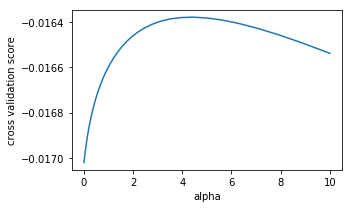

In [15]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-4, 1, 100)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha, normalize=False), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [16]:
ridge_1st = linear_model.Ridge(alphas[np.argmax(scores)], normalize=False)
ridge_1st.fit(x_train, y_train)
print(alphas[np.argmax(scores)])
print(ridge_1st.score(x_train, y_train))

4.43062145758
0.917527268155


In [14]:
model_to_csv(ridge_1st, x_test, test_ID, 'mul_ridge_1st.csv')

## Coef research

In [17]:
coef_ridge_1st = pd.concat([pd.Series(ridge_1st.coef_, name='coef'), pd.Series(x_train.columns,
                                                                                     name='Features')], axis=1)

In [18]:
coef_ridge_1st.loc[coef_ridge_1st.coef!=0,:].sort_values(by='coef', ascending=False).head()

,coef,Features
13,0.338699,GrLivArea
46,0.082012,MSZoning_FV
47,0.080151,MSZoning_RL
68,0.072260,Neighborhood_Crawfor
1,0.071632,LotArea


#############################################
## Multi Linear Lasso Model_1
#############################################

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

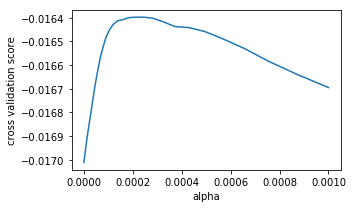

In [33]:
alphas = np.logspace(-6, -3, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Lasso(alpha, normalize=False), x_train, y_train, cv=5,
                          scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [34]:
lasso_1 = linear_model.Lasso(alphas[np.argmax(scores)], normalize=False)
lasso_1.fit(x_train, y_train)
print(lasso_3.score(x_train, y_train))
print(alphas[np.argmax(scores)])

0.917298259976
0.000212095088792


In [35]:
model_to_csv(lasso_1, x_test, test_ID, 'mul_lasso_1st.csv')

In [36]:
coef_ridge_1st = pd.concat([pd.Series(lasso_1.coef_, name='coef'), pd.Series(x_train.columns,
                                                                                     name='Features')], axis=1)

In [37]:
coef_ridge_1st.loc[coef_ridge_1st.coef!=0,:].sort_values(by='coef', ascending=False).head()

,coef,Features
13,0.407565,GrLivArea
46,0.100341,MSZoning_FV
47,0.083598,MSZoning_RL
142,0.070858,SaleType_New
1,0.069318,LotArea


In [ ]:
all_data_eng = all_data.copy()
all_data_eng = impute_multi_3(all_data_eng)
#use one_hot encoding to dummify all the category data
all_data_eng = pd.get_dummies(all_data_eng, drop_first=True, dummy_na=True)

In [ ]:
###choose the cut off of 2919*0.025 to filter out the binary column with a high unbalanced class.
drop_list=[]
for col in all_data_eng.columns:
    if len(all_data_eng[col].unique()) == 2 :
        if (all_data_eng.groupby(col).count()['LotFrontage'][0]>73) & (all_data_eng.groupby(col).count()['LotFrontage'][1]>73):
            continue
        else:
            drop_list.append(col)
#            all_data_eng.drop(col, axis=1, inplace=True)
    else:
        continue

In [ ]:
##drop the dumified columns that is imbalenced. (minor class)
all_data_eng.drop(drop_list, axis=1, inplace=True)

In [ ]:
#list of features that needs to be transformed by log
log_tran_list = ['LotArea', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                '2ndFlrSF', 'GrLivArea', 'TotalSF', 'GarageArea', 'OpenPorchSF', 'WoodDeckSF', 'LowQualFinSF']
##transform the features us created func
log_tran(all_data_eng, log_tran_list)

In [ ]:
#choose the first 1460 as train sample
x_train = all_data_eng.iloc[list(range(1460)),:]
#choose the first 1460 as train sample
x_test = all_data_eng.iloc[list(range(1460,2919)),:]
#y_train transformation. y=log(y-MiscValue)
y_train = [1000*log((y_train_raw[i] - x_train_raw['MiscVal'][i])) for i in range(len(y_train_raw))]

In [ ]:
alphas = np.logspace(-3, 0, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Lasso(alpha, normalize=True), x_train, y_train, cv=5,
                          scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [ ]:
lasso_3 = linear_model.Lasso(alphas[np.argmax(scores)], normalize=False)
lasso_3.fit(x_train, y_train)
print(lasso_3.score(x_train, y_train))
print(alphas[np.argmax(scores)])

In [ ]:
coef_lasso_3 = pd.concat([pd.Series(lasso_3.coef_, name='coef'), pd.Series(x_train.columns,
                                                                                     name='Features')], axis=1)
#coef_lasso_3.loc[coef_lasso_3.coef!=0,:].sort_values(by='coef', ascending=False)

In [ ]:
x_train

In [ ]:
model_to_csv(lasso_3, x_test, test_ID, 'mul_lasso_1st.csv')

## TREE Model

In [ ]:
from sklearn import ensemble
RF = ensemble.RandomForestRegressor()
#dir(ensemble)

In [ ]:
RF.set_params(oob_score=True, random_state=42)

In [ ]:
y_train_t = y_train_raw.copy()
x_train_t = x_train_raw.copy()
x_test_t = x_test_raw.copy()

In [ ]:
##SalePrice is logged.
y_train_t = [log(x) for x in y_train_t]

In [ ]:
#call the impute function in process module
all_data_imputed = impute_multi_2(all_data)

In [ ]:
tree_m1 = RF.fit(x_train_t, y_train_t)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [25, 100, 5],
    "min_samples_leaf": range(1, 3),
    "min_samples_split": np.linspace(start=2, stop=30, num=3, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1, verbose=1)
%time grid_search_forest.fit(x_train, y_train)

In [ ]:
#temp=pd.concat([pd.DataFrame(ridge_1st.coef_),pd.DataFrame(x_test.columns)], axis=1)
#temp.loc[abs(temp.iloc[:,0])>0.03,:]